In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.multitest import multipletests

In [2]:
ROOT = '/data1/wgs_APA/MAAPER_out/'

In [49]:
all_perturbations_redu = {}
all_perturbations_redi = {}
big_df_redu = None
big_df_redi = None
max_1 = 0
max_2 = 0
for perturbation in os.listdir(ROOT):
    try:
        name = perturbation.split('_')[0]
        df = pd.read_csv(ROOT + perturbation + '/gene.txt', sep='\t')
        # remove na from REDu column 
        df1 = df.dropna(subset=['REDu'])
        df2 = df.dropna(subset=['REDi'])
        p_adjusted = multipletests(df1['REDu.pval'], method='fdr_bh')[1]
        p_adjusted_redi = multipletests(df2['REDi.pval'], method='fdr_bh')[1]
        df1['p_adjusted'] = p_adjusted
        df2['p_adjusted'] = p_adjusted_redi
        df1 = df1[df1['p_adjusted'] < 0.1]
        df2 = df2[df2['p_adjusted'] < 0.1]
        # filter out non significant genes
        all_perturbations_redu[name] = df1
        all_perturbations_redi[name] = df2
        if len(all_perturbations_redu[name]) > max_1:
            max_1 = len(all_perturbations_redu[name])
            big_df_redu = df1
        if len(all_perturbations_redi[name]) > max_2:
            max_2 = len(all_perturbations_redi[name])
            big_df_redi = df2

    except:
        continue

In [50]:
perturbation_df_redu = pd.DataFrame(index=big_df_redu['gene'])
for perturbation in all_perturbations_redu:
    p_dict = dict(zip(all_perturbations_redu[perturbation]['gene'], all_perturbations_redu[perturbation]['REDu']))
    perturbation_df_redu[perturbation] = perturbation_df_redu.index.map(p_dict)
perturbation_df_redu = perturbation_df_redu.fillna(0)
perturbation_df_redu.head()

,CD8B,ZNF589,BYSL,IP6K2,EBF2,MEIS2,BUD23,NOS1AP,MYF6,TARBP2,...,TSTD2,WASHC4,NOBOX,OR7A17,PRKRIP1,PRICKLE3,ACSF3,ZNF77,PTRH2,ATP5MC1
gene,,,,,,,,,,,,,,,,,,,,,
AARS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCB7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# redi
perturbation_df_redi = pd.DataFrame(index=big_df_redi['gene'])
for perturbation in all_perturbations_redi:
    p_dict = dict(zip(all_perturbations_redi[perturbation]['gene'], all_perturbations_redi[perturbation]['REDi']))
    perturbation_df_redi[perturbation] = perturbation_df_redi.index.map(p_dict)
perturbation_df_redi = perturbation_df_redi.fillna(0)
perturbation_df_redi.head()

,CD8B,ZNF589,BYSL,IP6K2,EBF2,MEIS2,BUD23,NOS1AP,MYF6,TARBP2,...,TSTD2,WASHC4,NOBOX,OR7A17,PRKRIP1,PRICKLE3,ACSF3,ZNF77,PTRH2,ATP5MC1
gene,,,,,,,,,,,,,,,,,,,,,
ABCE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAD10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAP2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
print(perturbation_df_redu.shape)
print(perturbation_df_redi.shape)


(1657, 7652)
(1340, 7652)


In [58]:
# make union index for both dataframes, zero fill the nan values for missing genes 
union_index = list(set(perturbation_df_redu.index).union(set(perturbation_df_redi.index)))
len(union_index)
perturbation_df_redu = perturbation_df_redu.reindex(union_index).fillna(0)
perturbation_df_redi = perturbation_df_redi.reindex(union_index).fillna(0)

<Axes: xlabel='HNRNPC', ylabel='Density'>

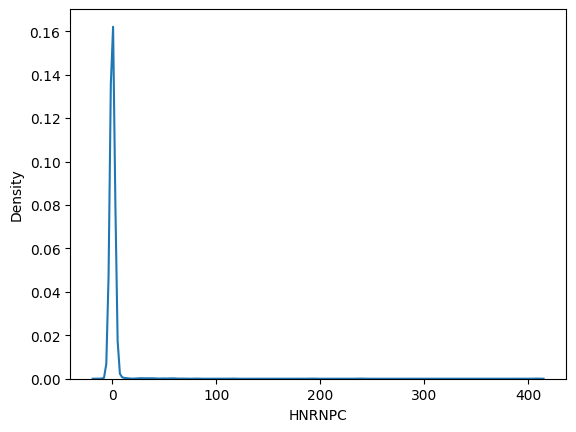

In [59]:
sns.kdeplot(perturbation_df_redu['HNRNPC'])

In [60]:
df = perturbation_df_redu.copy()

In [61]:
CPA_genes = ['CDC73', 'CLP1', 'CPEB1', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF4L',
            'CPSF6', 'CPSF7', 'CSTF1', 'CSTF2', 'CSTF2T', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 
            'NUDT21', 'PABPC1', 'PABPC4', 'PABPN1', 'PAF1', 'PAPD4', 'PAPD5', 'PAPD7', 'PAPOLA',
            'PAPOLG', 'PCF11', 'PHF3', 'RBBP6', 'RPAP2', 'RPRD1A', 'RPRD1B', 'SCAF1', 'SCAF11', 
            'SCAF4', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5']
len(CPA_genes)

42

In [62]:
cpa_columns = list(set(CPA_genes).intersection(set(df.columns)))
cpa_df = df[cpa_columns]
cpa_df

,CSTF1,RPRD1A,PABPN1,PABPC4,CSTF2T,PAPOLG,NUDT21,CSTF3,SF3A1,CPSF4,...,RPRD1B,PCF11,SCAF8,PHF3,SCAF11,SYMPK,LEO1,CPSF7,PAF1,CPEB1
gene,,,,,,,,,,,,,,,,,,,,,
ATM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RUFY3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTBP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMBIM1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNNM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLH3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SDCCAG8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
cpa_df

,CSTF1,RPRD1A,PABPN1,PABPC4,CSTF2T,PAPOLG,NUDT21,CSTF3,SF3A1,CPSF4,...,RPRD1B,PCF11,SCAF8,PHF3,SCAF11,SYMPK,LEO1,CPSF7,PAF1,CPEB1
gene,,,,,,,,,,,,,,,,,,,,,
ATM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RUFY3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTBP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMBIM1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNNM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLH3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SDCCAG8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# remove NA and inf values
cpa_df = cpa_df.replace([np.inf, -np.inf], np.nan)
cpa_df = cpa_df.dropna()

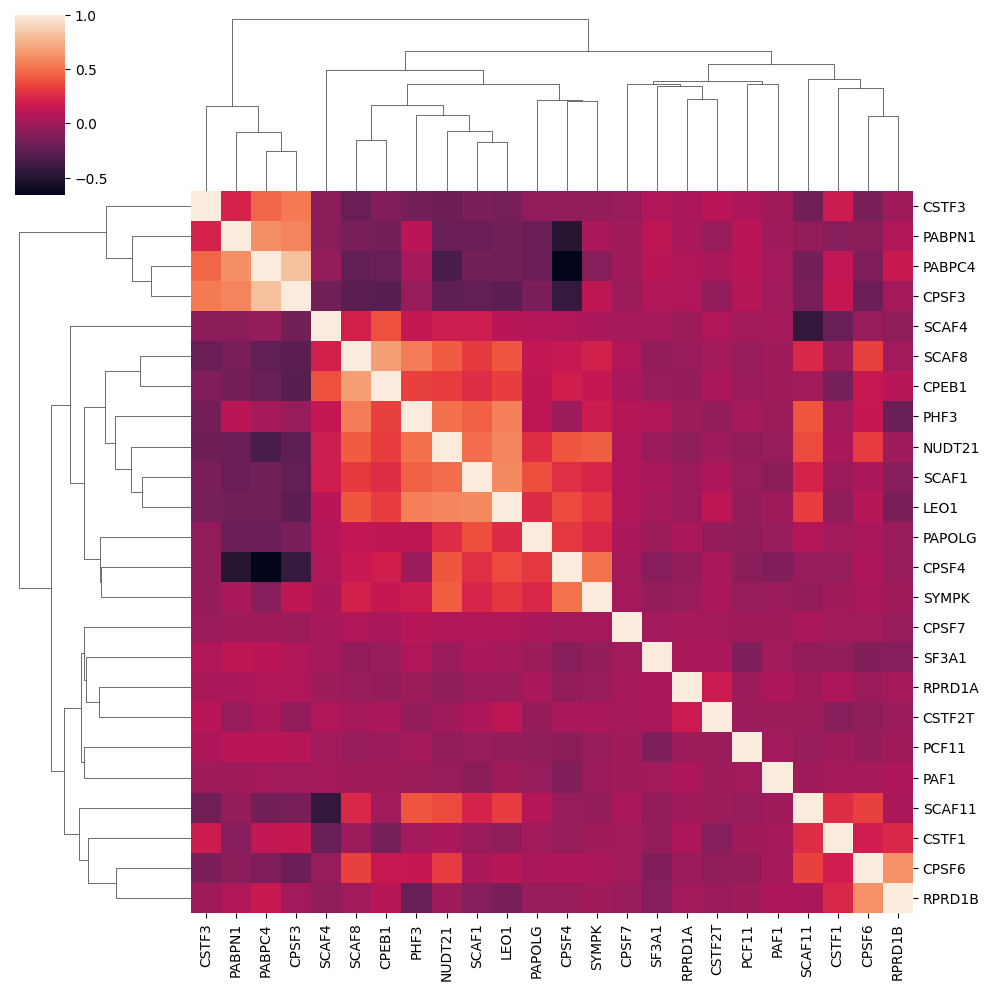

In [65]:
# lets cluster columns based on their correlation
corr = cpa_df.corr()
sns.clustermap(corr)

In [78]:
import pandas as pd

stratification_redu = {}
df1 = cpa_df.copy()
df2 = cpa_df_redi.copy()
# Stratify Affected Genes and Calculate Separate Medians
for perturbation in df1.columns:
    positive_values_redu = df1[perturbation][df1[perturbation] > 0]
    negative_values_redu = df1[perturbation][df1[perturbation] < 0]
    netative_values_redi= df2[perturbation][df2[perturbation] < 0]

    positive_count_redu = len(positive_values_redu)
    negative_count_redu = len(positive_values_redu)
    negative_count_redi = len(netative_values_redi)
    median_positive_redu = positive_values_redu.median() if positive_count_redu > 0 else 0
    median_negative_redu = negative_values_redu.median() if negative_count_redu > 0 else 0
    median_negative_redi = netative_values_redi.median() if negative_count_redi > 0 else 0

    stratification_redu[perturbation] = {
        'positive_count_redu': positive_count_redu, 
        'negative_count_redu': negative_count_redu, 
        'median_positive_redu': median_positive_redu, 
        'median_negative_redu': median_negative_redu,
        'negative_count_redi': negative_count_redi,
        'median_negative_redi': median_negative_redi
    }

# Convert to DataFrame
stratification_df = pd.DataFrame(stratification_redu).T  # Transpose to get perturbations as rows

# Display the DataFrame
stratification_df


,positive_count_redu,negative_count_redu,median_positive_redu,median_negative_redu,negative_count_redi,median_negative_redi
CSTF1,7.0,7.0,3.900,-3.490,30.0,-2.310
RPRD1A,5.0,5.0,3.330,-3.185,18.0,-2.260
PABPN1,3.0,3.0,3.150,-3.190,16.0,-3.400
PABPC4,1.0,1.0,1.170,-6.475,8.0,-6.510
CSTF2T,16.0,16.0,2.415,-2.340,9.0,-3.670
PAPOLG,79.0,79.0,3.780,-3.110,34.0,-2.560
NUDT21,22.0,22.0,6.445,-2.290,5.0,-5.640
CSTF3,0.0,0.0,0.000,0.000,1.0,-8.520
SF3A1,54.0,54.0,3.020,-2.950,40.0,-2.455
CPSF4,31.0,31.0,9.860,-12.500,8.0,-2.395


In [79]:
# fil NaN values with 0
stratification_df = stratification_df.fillna(0)
stratification_df

,positive_count_redu,negative_count_redu,median_positive_redu,median_negative_redu,negative_count_redi,median_negative_redi
CSTF1,7.0,7.0,3.900,-3.490,30.0,-2.310
RPRD1A,5.0,5.0,3.330,-3.185,18.0,-2.260
PABPN1,3.0,3.0,3.150,-3.190,16.0,-3.400
PABPC4,1.0,1.0,1.170,-6.475,8.0,-6.510
CSTF2T,16.0,16.0,2.415,-2.340,9.0,-3.670
PAPOLG,79.0,79.0,3.780,-3.110,34.0,-2.560
NUDT21,22.0,22.0,6.445,-2.290,5.0,-5.640
CSTF3,0.0,0.0,0.000,0.000,1.0,-8.520
SF3A1,54.0,54.0,3.020,-2.950,40.0,-2.455
CPSF4,31.0,31.0,9.860,-12.500,8.0,-2.395


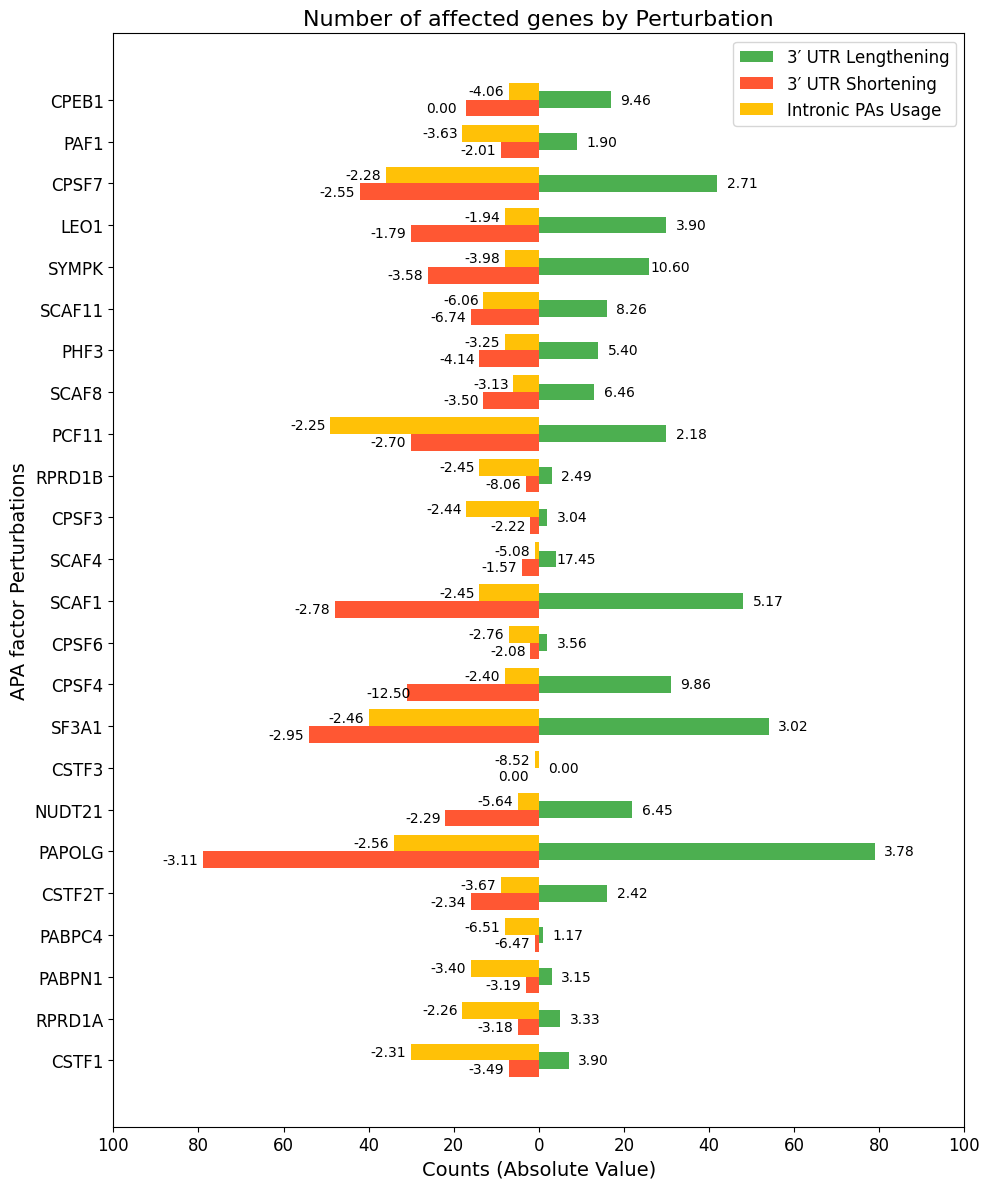

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming stratification_df is your DataFrame
df_subset = stratification_df.copy()
# Values for plotting
perturbations = np.arange(len(df_subset))  # Numeric indices for perturbations
positive_counts = df_subset['positive_count_redu']
negative_counts = df_subset['negative_count_redu']
median_positive = df_subset['median_positive_redu']
median_negative = df_subset['median_negative_redu']
median_negative_redi = df_subset['median_negative_redi']
negative_count_redi = df_subset['negative_count_redi']

# Create a new figure and set the size
plt.figure(figsize=(10, 12))  # Adjusted for horizontal orientation

# Create horizontal bar plots
# Bar plots for positive counts
plt.barh(perturbations, positive_counts, height=0.4, color='#4CAF50', label='3′ UTR Lengthening')

# Bar plots for the first set of negative counts
plt.barh(perturbations - 0.2, -negative_counts, height=0.4, color='#FF5733', label='3′ UTR Shortening')

# Bar plots for the second set of negative counts
plt.barh(perturbations + 0.2, -negative_count_redi, height=0.4, color='#FFC107', label='Intronic PAs Usage')

# Adding labels and title
plt.ylabel('APA factor Perturbations', fontsize=14)
plt.xlabel('Counts (Absolute Value)', fontsize=14)
plt.title('Number of affected genes by Perturbation', fontsize=16)

# Customize y-ticks to show as positive
xticks = plt.xticks()[0]
plt.xticks(xticks, [str(abs(int(x))) for x in xticks], fontsize=12)

# Rotate y-axis labels for better visibility
plt.yticks(perturbations, df_subset.index, fontsize=12)

# Adding legend
plt.legend(fontsize=12)

# Show median values next to each bar
offset = max(positive_counts.max(), negative_counts.max(), negative_count_redi.max()) * 0.12  # Offset for text
for i, (pc, nc, mp, mn, mn_redi, nc_redi) in enumerate(zip(positive_counts, negative_counts, median_positive, median_negative, median_negative_redi, negative_count_redi)):
    plt.text(pc + offset, i, f"{mp:.2f}", va='center', ha='right', fontsize=10, color='black')
    plt.text(-nc - offset, i - 0.2, f"{mn:.2f}", va='center', ha='left', fontsize=10, color='black')
    plt.text(-nc_redi - offset, i + 0.2, f"{mn_redi:.2f}", va='center', ha='left', fontsize=10, color='black')

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

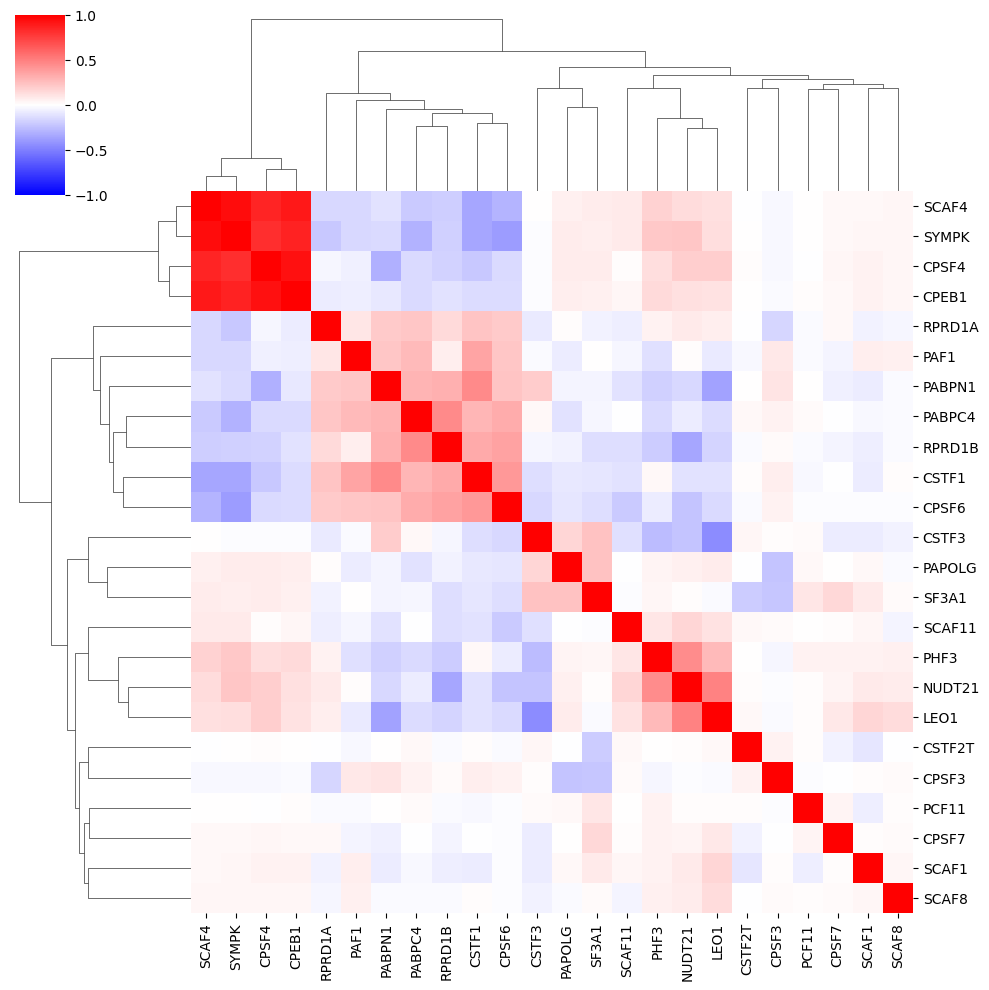

In [110]:
# do the same for REDi
df = perturbation_df_redi.copy()
cpa_redi = list(set(CPA_genes).intersection(set(df.columns)))
cpa_df_redi = df[cpa_redi]
# remove NA and inf values
cpa_df_redi = cpa_df_redi.replace([np.inf, -np.inf], np.nan)
cpa_df_redi = cpa_df_redi.dropna()
# lets cluster columns based on their correlation
corr1 = cpa_df_redi.corr()
sns.clustermap(corr1, cmap='bwr', vmin=-1, vmax=1)

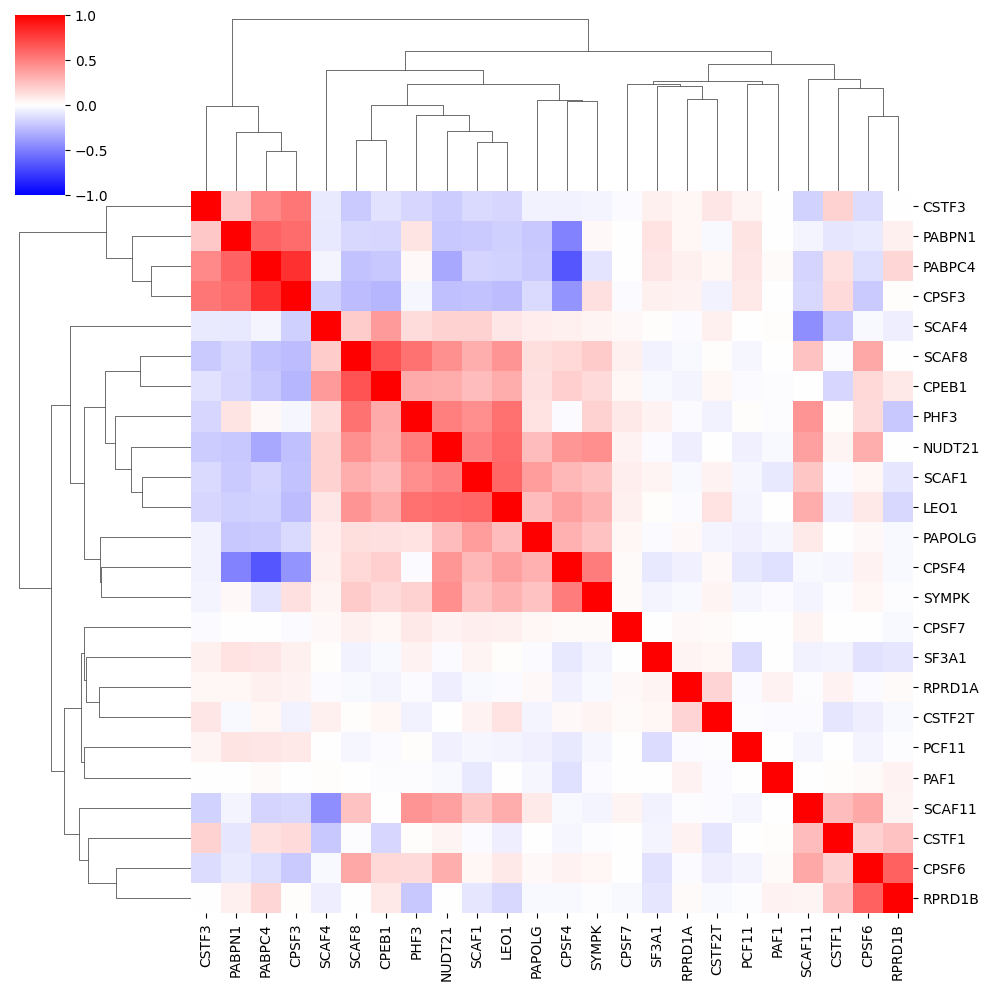

In [111]:
# do the same for REDi
df = perturbation_df_redu.copy()
cpa_redu = list(set(CPA_genes).intersection(set(df.columns)))
cpa_df_redu = df[cpa_redu]
# remove NA and inf values
cpa_df_redu = cpa_df_redu.replace([np.inf, -np.inf], np.nan)
cpa_df_redu = cpa_df_redu.dropna()
# lets cluster columns based on their correlation
corr2 = cpa_df_redu.corr()
sns.clustermap(corr2, cmap='bwr', vmin=-1, vmax=1)

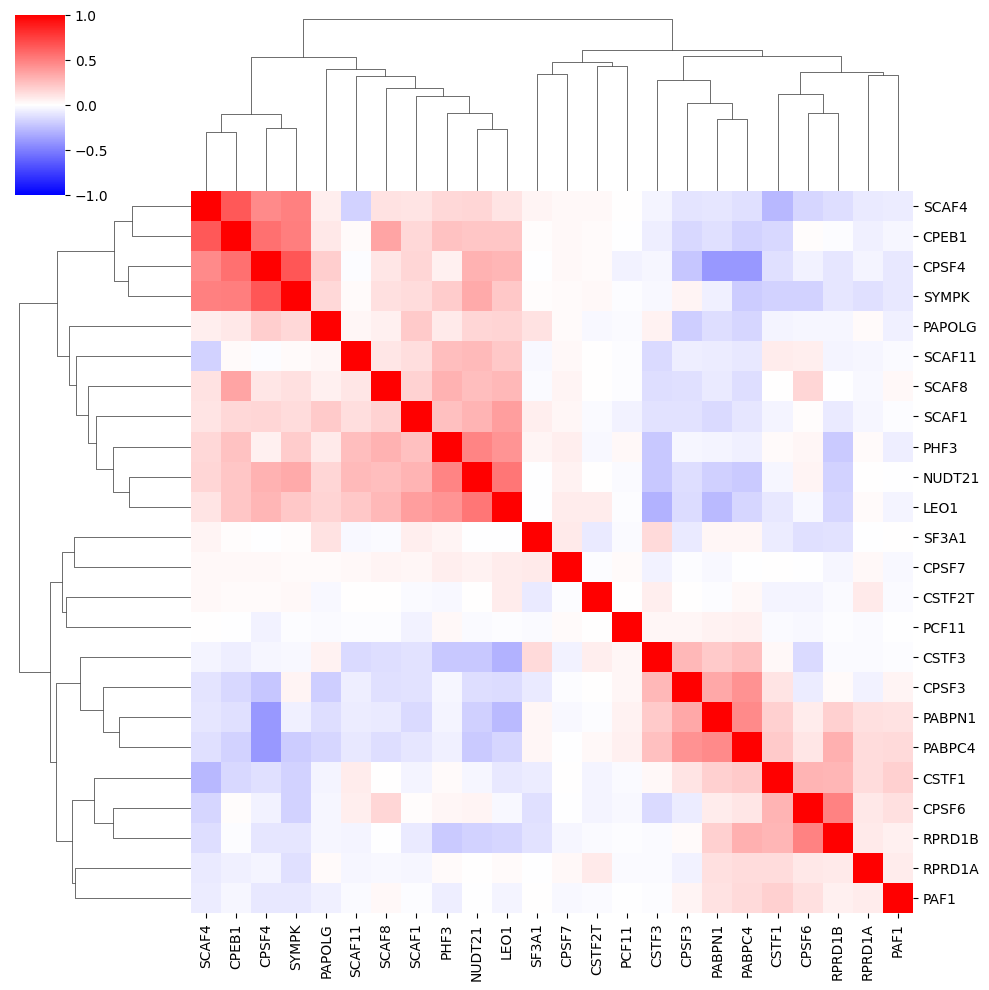

In [107]:
# average for corr1 and corr2
corr = (corr1 + corr2)/2
sns.clustermap(corr, cmap='bwr', vmin=-1, vmax=1)